# Intro

Este projeto é a entrega final do Projeto Aplicado, da especialização (MBA) em Ciência de Dados do IGTI

Autor: Augusto César Gontijo de Araújo
LinkedIn: https://www.linkedin.com/in/augusto-gontijo/

# Imports

## Libraries

Importando as bibliotecas

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings("ignore")

C:\Users\Augusto\AppData\Roaming\Python\Python38\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Data

Importanto os dados

In [2]:
df_bruto = pd.read_csv("kc_house_data.csv")

# Análise Exploratória de Dados (EDA)

Em estatística, a análise exploratória de dados (AED) é uma abordagem à análise de conjuntos de dados de modo a resumir suas características principais, frequentemente com métodos visuais. Um modelo estatístico pode ou não ser usado, mas primariamente a AED tem como objetivo observar o que os dados podem nos dizer além da modelagem formal ou do processo de teste de hipóteses. 

Fonte: https://pt.wikipedia.org/wiki/Análise_exploratória_de_dados

In [3]:
print("O 'df_bruto' contém {} linhas e {} colunas.".format(df_bruto.shape[0], df_bruto.shape[1]))

O 'df_bruto' contém 21613 linhas e 21 colunas.


## Entendendo os Dados

### Tipagem dos Dados

In [4]:
# Verificando a tipagem das colunas
df_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Dados Faltantes

In [5]:
# Verificando a presença de valores faltantes.
df_bruto.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Amostragem dos Dados

In [6]:
# Verificando os primeiros 10 registros
df_bruto.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
5,7237550310,20140512T000000,1225000.00,4,4.50,5420,101930,1.00,0,0,...,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930
6,1321400060,20140627T000000,257500.00,3,2.25,1715,6819,2.00,0,0,...,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819
7,2008000270,20150115T000000,291850.00,3,1.50,1060,9711,1.00,0,0,...,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711
8,2414600126,20150415T000000,229500.00,3,1.00,1780,7470,1.00,0,0,...,7,1050,730,1960,0,98146,47.51,-122.34,1780,8113
9,3793500160,20150312T000000,323000.00,3,2.50,1890,6560,2.00,0,0,...,7,1890,0,2003,0,98038,47.37,-122.03,2390,7570


### Resumo Estatístico

In [7]:
# Verificando o resumo estatístico
df_bruto.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


## Limpeza dos dados

In [8]:
# Removendo as colunas id e date - nesse projeto elas não serão úteis.
df = df_bruto.drop(['id','date'], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [9]:
# Banheiros e andares estão como decimal (o que não faz sentido)

banheiros = list(df['bathrooms'].unique())
print(f"Quantidade de banheiros: {banheiros}")

banheiros = list(df['floors'].unique())
print(f"Quantidade de andares: {banheiros}")

Quantidade de banheiros: [1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.75, 3.25, 4.0, 3.5, 0.75, 4.75, 5.0, 4.25, 3.75, 0.0, 1.25, 5.25, 6.0, 0.5, 5.5, 6.75, 5.75, 8.0, 7.5, 7.75, 6.25, 6.5]
Quantidade de andares: [1.0, 2.0, 1.5, 3.0, 2.5, 3.5]


In [10]:
# Dessa forma, iremos arredondar as colunas que estão como float e convertê-las para int

colunas = ['bathrooms', 'floors', 'price']

for coluna in colunas:
    df[coluna] = df[coluna].round(0).astype(int)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [11]:
# Verificando novamente os banheiros e andares únicos

banheiros = list(df['bathrooms'].unique())
print(f"Quantidade de banheiros: {banheiros}")

banheiros = list(df['floors'].unique())
print(f"Quantidade de andares: {banheiros}")

Quantidade de banheiros: [1, 2, 3, 4, 5, 0, 6, 7, 8]
Quantidade de andares: [1, 2, 3, 4]


## Analisando os Dados

### Distribuição das variáveis

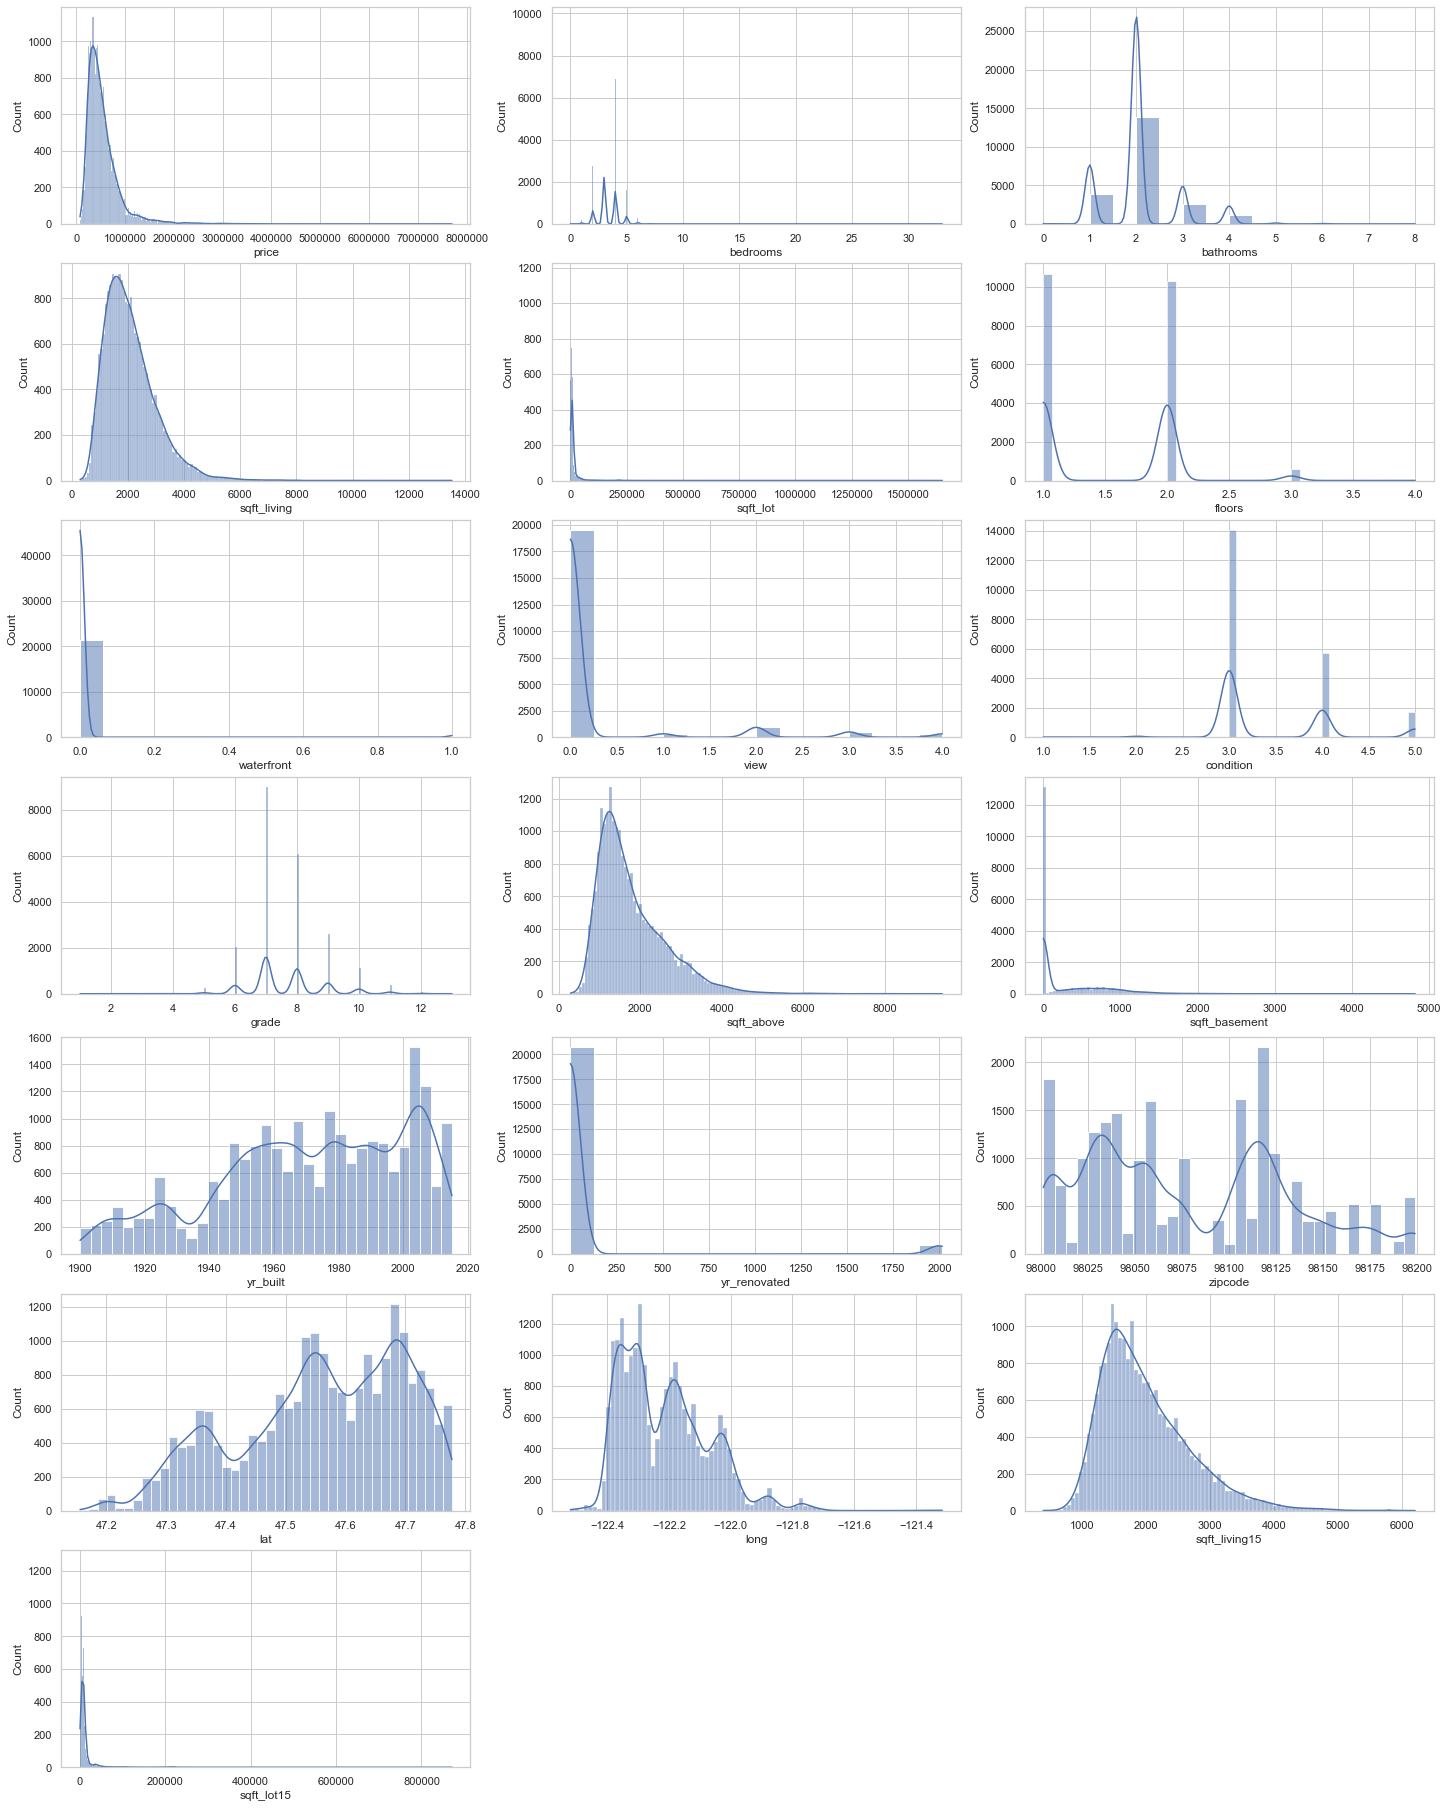

In [12]:
# Plotando a distribuição de cada uma das colunas individualmente

fig = plt.figure(figsize=(20, 25), constrained_layout = True)

for i in range(len(df.columns)):
            
    plt.subplot(7, 3, i+1) 

    sns.histplot(data = df, 
                 x = df[df.columns[i]], 
                 kde=True
    )

    plt.ticklabel_format(style='plain')

Principais observações:

* O preço das casas em sua grande maioria está abaixo de $ 200.000
* A maioria das casas possuem entre 1 e 5 quartos
* A maioria das casas possuem 2 banheiros
* A maioria das casas possuem tamanho da sala de estar entre 0 e 6.000 sqft
* A maioria das casas possuem tamanho do lote abaixo de 100.000 sqft
* A maioria das casas possuem 1 ou 2 andares
* A grande maioria das casas não possuem vista para o mar
* A grande maioria das casas possuem a pontuação de vista de 0
* Em uma escala de 1 a 5, a maioria das casas estão em boa condição (maior ou igual a 3)
* A maioria das casas possuem uma classe entre 6 e 10, sendo que a grande maioria está na classe 7
* A maioria das casas possuam área coberta menor que 4.000 sqft, com a grande maioria concentrada em 1.000 sqft
* A grande maioria das casas não possuem porão, e as que possuem, o tamanho tende a ser menor que 1.000 sqft
* Existem casas com data de construção variando entre 1900 a 2015, sendo que as casas construídas nos anos 30 são as mais raras e as construídas nos anos 2000 as mais comuns
* A grande maioria das casas não foi reformada
* As distribuições das colunas sqft_living15 e sqft_lot15 se assemelham muito às colunas sqft_living e sqft_lot, respectivamente.

### Matriz de Correlação

<AxesSubplot:>

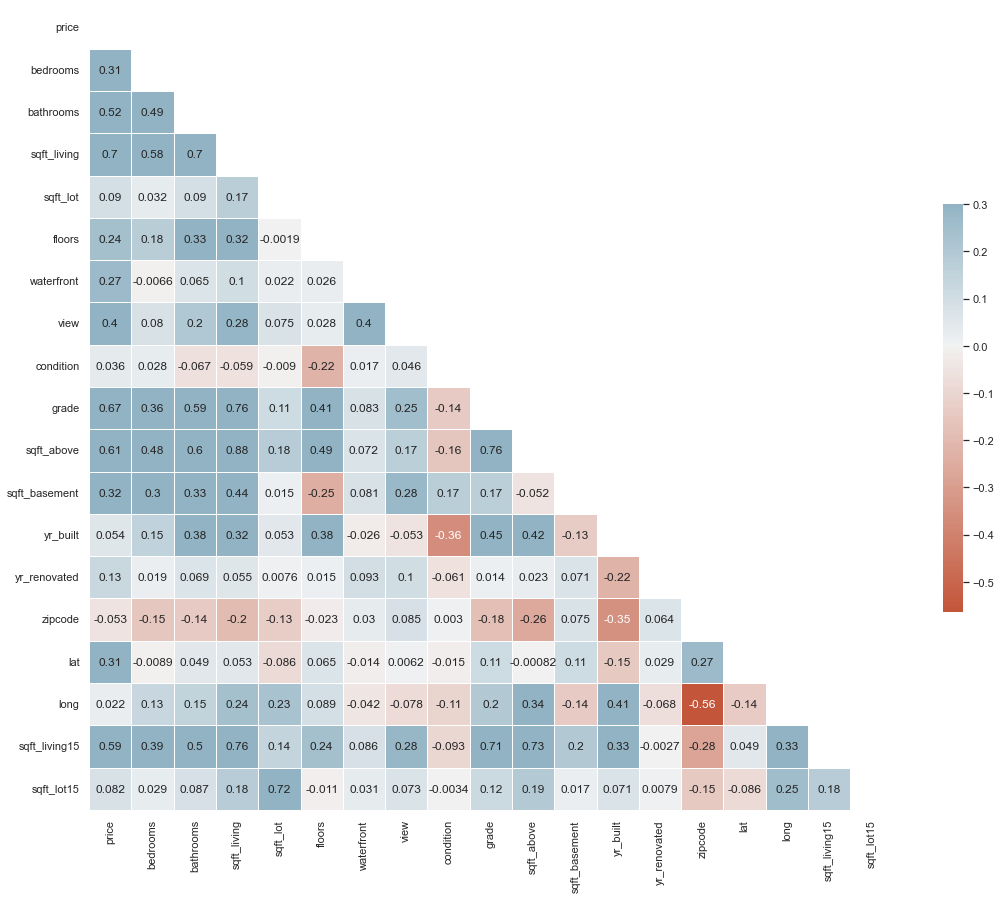

In [13]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(18, 15))

cmap = sns.diverging_palette(20, 230, as_cmap=True)

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            annot = True)

Principais observações:

* Nota-se as principais variáveis que possuam correlação média/forte (acima de 0.5) com o alvo (preço) são: bathrooms, sqft_living, grade, sqft_above. Dessa forma, pode-se supor que:
    * Mais banheiros aumentam o preço da casa
    * Quanto maior a classe, maior o preço da casa
    * Quanto maior o tamanho da área coberta, maior o preço
    * Quanto maior o tamanho da sala de estar, maior o preço.

----------------------

* Pode-se observar algumas variávias com correlação média/fraca (entre 0.3 e 0.5) com com o alvo (preço): lat, sqft_basement, view, bedrooms. Podemos supor que:
    * Quando a latitude aumenta, o preço aumenta ligeiramente. Ou seja, casas localizadas mais a oeste do condado são mais valorizadas
    * Casas que possuem porão são ligeiramente mais valorizadas
    * Casas que possuem uma boa vista são ligeiramente mais valorizadas
    * Casas que possuem mais quartos são ligeiramente mais valorizadas

### Preço x Variáveis com correlação forte

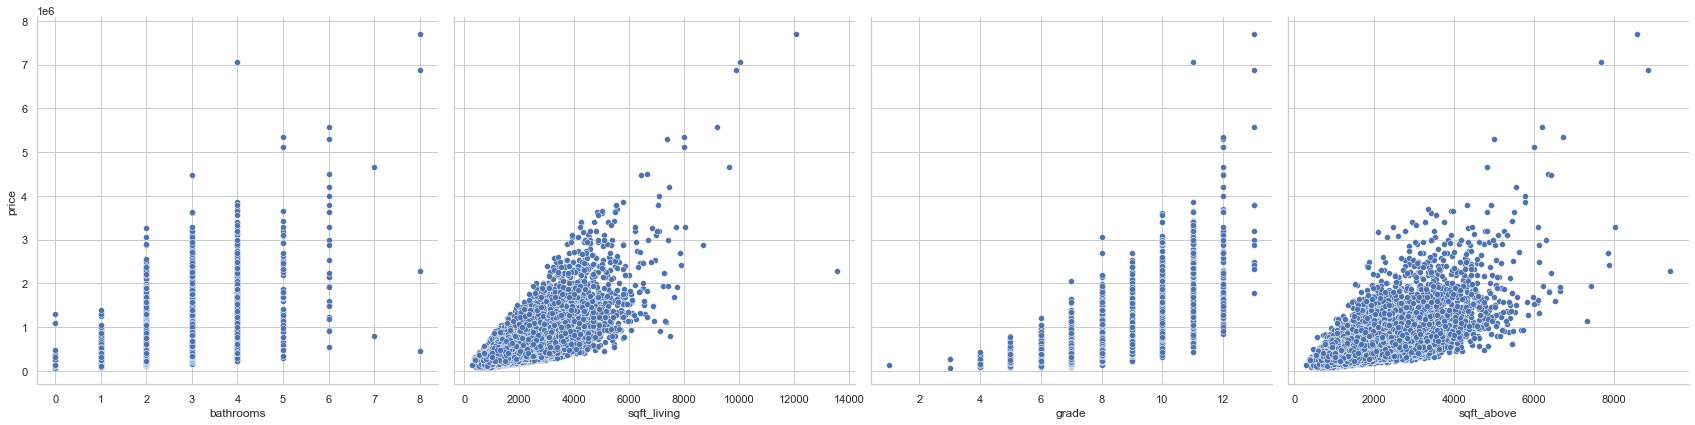

In [14]:
sns.pairplot(df, 
             x_vars=['bathrooms', 'sqft_living', 'grade', 'sqft_above'], 
             y_vars=['price'],
             size = 6
             )

### Preço x Variáveis com correlação média/fraca

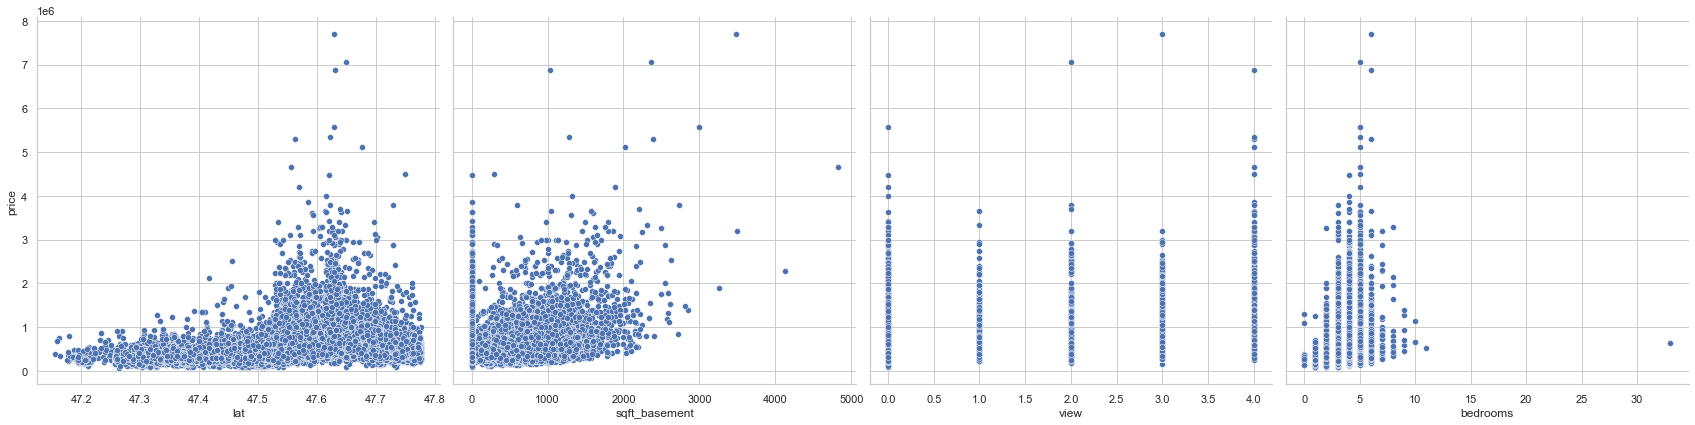

In [15]:
sns.pairplot(df, 
             x_vars=['lat', 'sqft_basement', 'view', 'bedrooms'], 
             y_vars=['price'],
             size = 6
             )

### Visualização da relação Preço x Variáveis Discretas

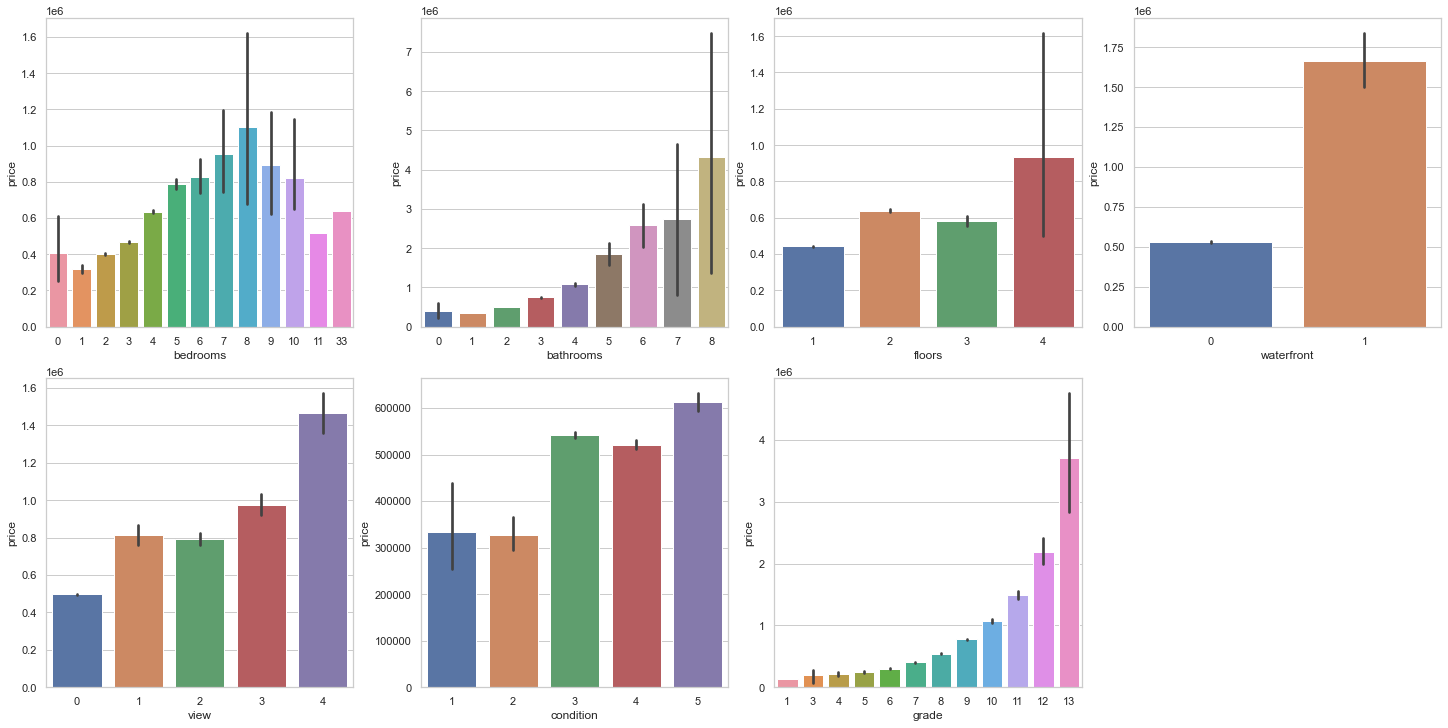

In [16]:
variaveis = df[(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade'])]

fig = plt.figure(figsize=(20,10), constrained_layout=True)

for i in range(len(variaveis.columns)):

    plt.subplot(2, 4, i+1)

    sns.barplot(data = variaveis, 
                x = variaveis[variaveis.columns[i]], 
                y = df['price']
                )   

# Feature Engineering

In [17]:
# Verificando o estado atual do conjunto de dados

df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
5,1225000,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930
6,257500,3,2,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819
7,291850,3,2,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711
8,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.51,-122.34,1780,8113
9,323000,3,2,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.37,-122.03,2390,7570


### Criando novas variáveis

#### Anos desde a última reforma

In [18]:
df['years_since_renovation'] = 0

In [19]:
for i in df.index:
    if df['yr_renovated'][i] == 0:
        df['years_since_renovation'][i] = 2015 - df['yr_built'][i]
    else:
        df['years_since_renovation'][i] = df['yr_renovated'][i] - df['yr_built'][i]  

np.all(np.isfinite(df)) 
    

True

In [20]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_renovation
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,60
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,40
2,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,82
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,50
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,28


#### % do lote que a sala de estar ocupa

In [21]:
df['%_living'] = 0.0

In [22]:
for i in df.index:
    df['%_living'][i] = df['sqft_living'][i] / df['sqft_lot'][i]

np.all(np.isfinite(df))

True

In [23]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_renovation,%_living
0,221900,3,1,1180,5650,1,0,0,3,7,...,0,1955,0,98178,47.51,-122.26,1340,5650,60,0.21
1,538000,3,2,2570,7242,2,0,0,3,7,...,400,1951,1991,98125,47.72,-122.32,1690,7639,40,0.35
2,180000,2,1,770,10000,1,0,0,3,6,...,0,1933,0,98028,47.74,-122.23,2720,8062,82,0.08
3,604000,4,3,1960,5000,1,0,0,5,7,...,910,1965,0,98136,47.52,-122.39,1360,5000,50,0.39
4,510000,3,2,1680,8080,1,0,0,3,8,...,0,1987,0,98074,47.62,-122.05,1800,7503,28,0.21


#### % do lote que a área coberta ocupa

In [24]:
df['%_above'] = 0.0

In [25]:
for i in df.index:
    df['%_above'][i] = df['sqft_above'][i] / df['sqft_lot'][i]

np.all(np.isfinite(df))

True

In [26]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_renovation,%_living,%_above
0,221900,3,1,1180,5650,1,0,0,3,7,...,1955,0,98178,47.51,-122.26,1340,5650,60,0.21,0.21
1,538000,3,2,2570,7242,2,0,0,3,7,...,1951,1991,98125,47.72,-122.32,1690,7639,40,0.35,0.30
2,180000,2,1,770,10000,1,0,0,3,6,...,1933,0,98028,47.74,-122.23,2720,8062,82,0.08,0.08
3,604000,4,3,1960,5000,1,0,0,5,7,...,1965,0,98136,47.52,-122.39,1360,5000,50,0.39,0.21
4,510000,3,2,1680,8080,1,0,0,3,8,...,1987,0,98074,47.62,-122.05,1800,7503,28,0.21,0.21


#### % do lote que o porão ocupa

In [27]:
df['%_basement'] = 0.0

In [28]:
for i in df.index:
    if df['sqft_basement'][i] == 0:
        df['%_basement'][i] == 0.0
    else:
        df['%_basement'][i] = df['sqft_basement'][i] / df['sqft_lot'][i]

np.all(np.isfinite(df))

True

In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_renovation,%_living,%_above,%_basement
0,221900,3,1,1180,5650,1,0,0,3,7,...,0,98178,47.51,-122.26,1340,5650,60,0.21,0.21,0.00
1,538000,3,2,2570,7242,2,0,0,3,7,...,1991,98125,47.72,-122.32,1690,7639,40,0.35,0.30,0.06
2,180000,2,1,770,10000,1,0,0,3,6,...,0,98028,47.74,-122.23,2720,8062,82,0.08,0.08,0.00
3,604000,4,3,1960,5000,1,0,0,5,7,...,0,98136,47.52,-122.39,1360,5000,50,0.39,0.21,0.18
4,510000,3,2,1680,8080,1,0,0,3,8,...,0,98074,47.62,-122.05,1800,7503,28,0.21,0.21,0.00


#### Proporção banheiros / quartos

In [30]:
df['ratio_bath_bed'] = 0.0

In [31]:
for i in df.index:
    if df['bedrooms'][i] == 0:
        df['ratio_bath_bed'][i] = 0.0
    else:
        df['ratio_bath_bed'][i] = df['bathrooms'][i] / df['bedrooms'][i]

np.all(np.isfinite(df))

True

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_renovation,%_living,%_above,%_basement,ratio_bath_bed
0,221900,3,1,1180,5650,1,0,0,3,7,...,98178,47.51,-122.26,1340,5650,60,0.21,0.21,0.00,0.33
1,538000,3,2,2570,7242,2,0,0,3,7,...,98125,47.72,-122.32,1690,7639,40,0.35,0.30,0.06,0.67
2,180000,2,1,770,10000,1,0,0,3,6,...,98028,47.74,-122.23,2720,8062,82,0.08,0.08,0.00,0.50
3,604000,4,3,1960,5000,1,0,0,5,7,...,98136,47.52,-122.39,1360,5000,50,0.39,0.21,0.18,0.75
4,510000,3,2,1680,8080,1,0,0,3,8,...,98074,47.62,-122.05,1800,7503,28,0.21,0.21,0.00,0.67


#### Tamanho por número de cômodos

In [33]:
df['sqft_per_room'] = 0.0

In [34]:
for i in df.index:
    if (df['bathrooms'][i] + df['bedrooms'][i]) == 0:
        df['sqft_per_room'][i] = df['sqft_living'][i]
    else:
        df['sqft_per_room'][i] = df['sqft_living'][i] / (df['bathrooms'][i] + df['bedrooms'][i])

np.all(np.isfinite(df))

True

#### Visualizando o comportamento das novas variáveis x Preço

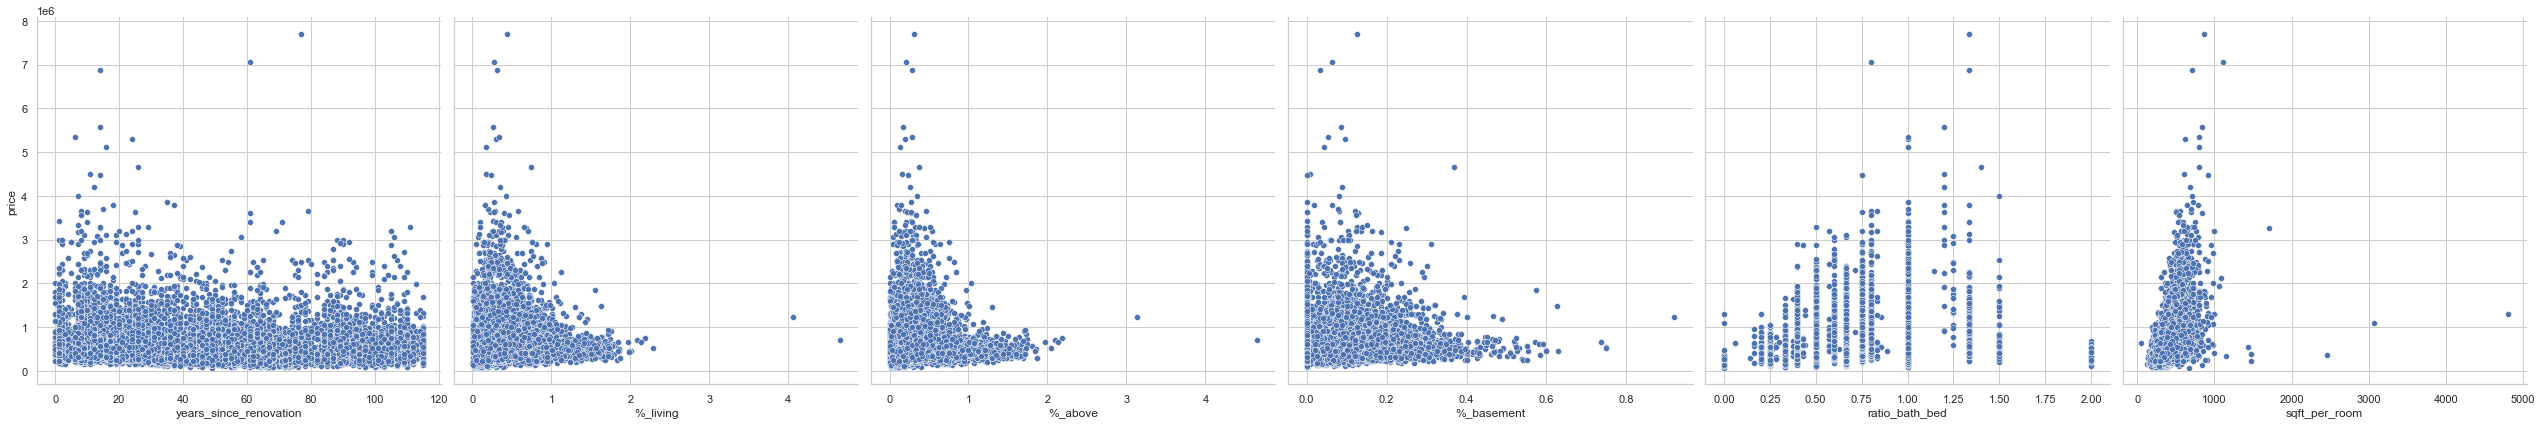

In [35]:
sns.pairplot(df, 
             x_vars=['years_since_renovation', '%_living', '%_above', '%_basement', 'ratio_bath_bed', 'sqft_per_room'], 
             y_vars=['price'],
             size = 6
             )

### Removendo variáveis de baixa expressividade

In [36]:
for column in df.columns:
    print(column)

price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15
years_since_renovation
%_living
%_above
%_basement
ratio_bath_bed
sqft_per_room


In [37]:
remover = ['yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']

df.drop(columns = remover, inplace=True)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,years_since_renovation,%_living,%_above,%_basement,ratio_bath_bed,sqft_per_room
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,47.51,-122.26,60,0.21,0.21,0.00,0.33,295.00
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,47.72,-122.32,40,0.35,0.30,0.06,0.67,514.00
2,180000,2,1,770,10000,1,0,0,3,6,770,0,47.74,-122.23,82,0.08,0.08,0.00,0.50,256.67
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,47.52,-122.39,50,0.39,0.21,0.18,0.75,280.00
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,47.62,-122.05,28,0.21,0.21,0.00,0.67,336.00


# Modelagem

In [38]:
data = df.copy()

In [39]:
X = data.drop('price', axis=1)
y = data.price

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 66)


print("O 'X_train' contém {} linhas e {} colunas.".format(X_train.shape[0], X_train.shape[1]))
print("O 'X_test' contém {} linhas e {} colunas.".format(X_test.shape[0], X_test.shape[1]))
print("O 'y_train' contém {} linhas.".format(y_train.shape[0]))
print("O 'y_test' contém {} linhas .".format(y_test.shape[0]))

O 'X_train' contém 17290 linhas e 19 colunas.
O 'X_test' contém 4323 linhas e 19 colunas.
O 'y_train' contém 17290 linhas.
O 'y_test' contém 4323 linhas .


In [41]:
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [55]:
# Criando instância do modelo
LM = HuberRegressor()

# Configurando o método de validação cruzada
kfold = KFold(n_splits = 10)

# Criando dicionário de parâmetros
lm_param_grid = {"epsilon": [1.1, 1.2, 1.35, 1.4]}

# Criando instância do GridSearch
gsLM = GridSearchCV(LM,
                     param_grid = lm_param_grid, 
                     cv = kfold,                                            
                     n_jobs = -1, 
                     verbose = 1,
                     scoring = 'r2')

# Ajustando os dados conforme o GridSearch
gsLM.fit(X_train, y_train)

# Melhor estimador
LM_best = gsLM.best_estimator_

# Melhor resultado
LM_score = (gsLM.best_score_ * 100).round(2)

# Imprimindo
print("Linear Regression best score: {}%".format(LM_score))

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   22.2s finished


Linear Regression best score: 64.26%


In [43]:
# Creating Random Forest instance 
RFR = RandomForestRegressor()

# Setting the cross validation method
kfold = KFold(n_splits = 10)

# Creating a dict with some parameters
rf_param_grid = {"max_depth": [None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [2, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [False],
                 "n_estimators": [100, 300]                 
                 }

# Creating the Grid Search instance (this will iterate through the parameters above and find the optimal combination)
gsRFR = GridSearchCV(RFR,
                     param_grid = rf_param_grid, 
                     cv = kfold, 
                     n_jobs = -1, 
                     verbose = 1,
                     scoring = 'r2')

# Fitting the Grid Search with our data
gsRFR.fit(X_train, y_train)

# Getting the best estimator (with the optimal parameter combination)
RFR_best = gsRFR.best_estimator_

# Getting the best accuracy score
RFR_score = (gsRFR.best_score_ * 100).round(2)

# Printing the best score
print("Random Forest best score: {}%".format(RFR_score))

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 23.2min finished


Random Forest best score: 87.03%


In [44]:
# Creating XGB instance 
XGB = XGBRegressor()

# Setting the cross validation method
kfold = KFold(n_splits=10)

# Creating a dict with some parameters
xgb_params = {'nthread':[4], 
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]
              }

# Creating the Grid Search instance (this will iterate through the parameters above and find the optimal combination)
gsXGB = GridSearchCV(XGB,
                     param_grid = xgb_params, 
                     cv = kfold, 
                     n_jobs = -1, 
                     verbose = 1,
                     scoring = 'r2')



# Fitting the Grid Search with our data
gsXGB.fit(X_train, y_train)

# Getting the best estimator (with the optimal parameter combination)
XGB_best = gsXGB.best_estimator_

# Getting the best accuracy score
XGB_score = (gsXGB.best_score_ * 100).round(2)

# Printing the best score
print("XGBoost best score: {}%".format(XGB_score))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  6.6min finished


XGBoost best score: 89.01%


In [45]:
# Creating CatBoost instance 
CB = CatBoostRegressor()

# Setting the cross validation method
kfold = KFold(n_splits=10)

# Creating a dict with some parameters
cb_params = {'depth': [4,5,6,7,8,9,10],
             'learning_rate': [0.01,0.02,0.03,0.04],
             'iterations': [10,20,30,40,50,60,70,80,90,100]
            }

# Creating the Grid Search instance (this will iterate through the parameters above and find the optimal combination)
gsCB = GridSearchCV(CB,
                     param_grid = cb_params, 
                     cv = kfold, 
                     n_jobs = -1, 
                     verbose = 1,
                     scoring = 'r2')



# Fitting the Grid Search with our data
gsCB.fit(X_train, y_train)

# Getting the best estimator (with the optimal parameter combination)
CB_best = gsCB.best_estimator_

# Getting the best accuracy score
CB_score = (gsCB.best_score_ * 100).round(2)

# Printing the best score
print("CatBoost best score: {}%".format(CB_score))

Fitting 10 folds for each of 280 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed: 35.5min finished


0:	learn: 356494.6811327	total: 147ms	remaining: 14.5s
1:	learn: 347744.1588758	total: 156ms	remaining: 7.63s
2:	learn: 338707.5693231	total: 168ms	remaining: 5.43s
3:	learn: 330392.8695400	total: 180ms	remaining: 4.32s
4:	learn: 322137.3780265	total: 193ms	remaining: 3.67s
5:	learn: 314104.2323930	total: 205ms	remaining: 3.21s
6:	learn: 306425.8609273	total: 218ms	remaining: 2.9s
7:	learn: 299277.6752862	total: 231ms	remaining: 2.65s
8:	learn: 292555.0168477	total: 244ms	remaining: 2.46s
9:	learn: 285860.6450063	total: 258ms	remaining: 2.32s
10:	learn: 279535.4081197	total: 271ms	remaining: 2.2s
11:	learn: 273640.4021211	total: 286ms	remaining: 2.09s
12:	learn: 267650.5111443	total: 300ms	remaining: 2s
13:	learn: 262003.8644306	total: 314ms	remaining: 1.93s
14:	learn: 256598.9603460	total: 327ms	remaining: 1.85s
15:	learn: 251498.5768720	total: 341ms	remaining: 1.79s
16:	learn: 246644.7864351	total: 355ms	remaining: 1.73s
17:	learn: 241770.4377952	total: 371ms	remaining: 1.69s
18:	lea

In [58]:
# Melhor performance individual de cada algoritmo

results = pd.DataFrame({"Estimator": ["Huber", "RandomForest", "XGB", "CatBoost"],
                        "R2 Score": [LM_score, RFR_score, XGB_score, CB_score]})
results

,Estimator,R2 Score
0,Huber,64.26
1,RandomForest,87.03
2,XGB,89.01
3,CatBoost,84.77


### XGBoost (dados de teste)

In [60]:
xgb_test_predict = pd.Series(XGB_best.predict(X_test), name = "price_pred")

xgb_results = pd.concat([y_test.reset_index(drop=True), xgb_test_predict], axis = 1)

In [61]:
# Avaliando os resultados do XGBoost

mae = mean_absolute_error(y_test.reset_index(drop=True), xgb_test_predict)

mse = mean_squared_error(y_test.reset_index(drop=True), xgb_test_predict)

rmse = math.sqrt(mean_squared_error(y_test.reset_index(drop=True), xgb_test_predict))

r2 = r2_score(y_test.reset_index(drop=True), xgb_test_predict)

print(f"O MAE do XGB foi de: {mae}")
print(f"O MSE do XGB foi de: {mse}")
print(f"O RMSE do XGB foi de: {rmse}")
print(f"O R2 do XGB foi de: {r2}")

O MAE do XGB foi de: 108053.60201068413
O MSE do XGB foi de: 27564614534.063557
O RMSE do XGB foi de: 166025.94536416154
O R2 do XGB foi de: 0.7984188184934253


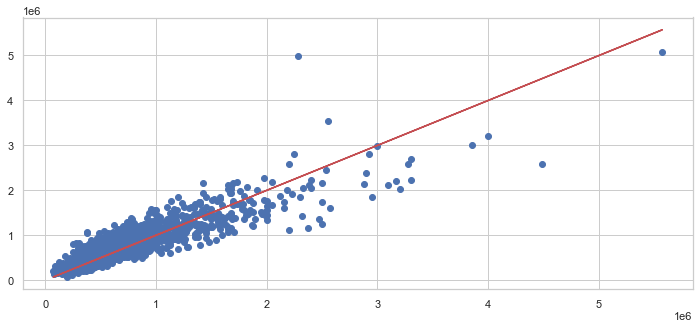

In [62]:
# Visualizando o ajuste do voting emsemble

plt.figure(figsize=(12, 5))
plt.scatter(y_test, xgb_test_predict)
plt.plot(y_test, y_test, c='r')

In [54]:
# Visualizando os valores reais versus as previsões

xgb_results['diff'] = xgb_results['price'] - xgb_results['price_pred']

xgb_results.sort_values(by='price', ascending=False)

,price,price_pred,diff
3738,5570000,4447375.91,1122624.09
1733,4489000,2682549.42,1806450.58
4090,4000000,3328180.28,671819.72
3103,3850000,3165982.68,684017.32
964,3300000,2208163.42,1091836.58
...,...,...,...
996,89000,186015.88,-97015.88
3835,85000,188102.56,-103102.56
2757,81000,215095.19,-134095.19
3144,80000,277231.49,-197231.49


### Ensemble Modeling

In [46]:
# Instanciando o emsemble utilizando apenas modelos com score acima de 80%

voting_regressor = VotingRegressor(estimators=[('rfr', RFR_best),
                                               ('xgb', XGB_best), 
                                               ('cb', CB_best)]
                                              )

votingR = voting_regressor.fit(X_train, y_train)

emsemble_test_predict = pd.Series(voting_regressor.predict(X_test), name = "price_pred")

emsemble_results = pd.concat([y_test.reset_index(drop=True), emsemble_test_predict], axis = 1)

0:	learn: 356494.6811327	total: 12.6ms	remaining: 1.25s
1:	learn: 347744.1588758	total: 19.3ms	remaining: 945ms
2:	learn: 338707.5693231	total: 29.7ms	remaining: 962ms
3:	learn: 330392.8695400	total: 39.3ms	remaining: 944ms
4:	learn: 322137.3780265	total: 52ms	remaining: 988ms
5:	learn: 314104.2323930	total: 62.8ms	remaining: 984ms
6:	learn: 306425.8609273	total: 72.6ms	remaining: 965ms
7:	learn: 299277.6752862	total: 85.3ms	remaining: 981ms
8:	learn: 292555.0168477	total: 98.1ms	remaining: 992ms
9:	learn: 285860.6450063	total: 109ms	remaining: 981ms
10:	learn: 279535.4081197	total: 119ms	remaining: 965ms
11:	learn: 273640.4021211	total: 130ms	remaining: 953ms
12:	learn: 267650.5111443	total: 139ms	remaining: 933ms
13:	learn: 262003.8644306	total: 151ms	remaining: 925ms
14:	learn: 256598.9603460	total: 161ms	remaining: 915ms
15:	learn: 251498.5768720	total: 171ms	remaining: 897ms
16:	learn: 246644.7864351	total: 183ms	remaining: 893ms
17:	learn: 241770.4377952	total: 196ms	remaining: 8

In [47]:
# Avaliando os resultados do emsemble

mae = mean_absolute_error(y_test.reset_index(drop=True), emsemble_test_predict)

mse = mean_squared_error(y_test.reset_index(drop=True), emsemble_test_predict)

rmse = math.sqrt(mean_squared_error(y_test.reset_index(drop=True), emsemble_test_predict))

r2 = r2_score(y_test.reset_index(drop=True), emsemble_test_predict)

print(f"O MAE do Voting Emsemble foi de: {mae}")
print(f"O MSE do Voting Emsemble foi de: {mse}")
print(f"O RMSE do Voting Emsemble foi de: {rmse}")
print(f"O R2 do Voting Emsemble foi de: {r2}")

O MAE do Voting Emsemble foi de: 103582.99882910945
O MSE do Voting Emsemble foi de: 23803077859.90843
O RMSE do Voting Emsemble foi de: 154282.46128419272
O R2 do Voting Emsemble foi de: 0.8259270938629021


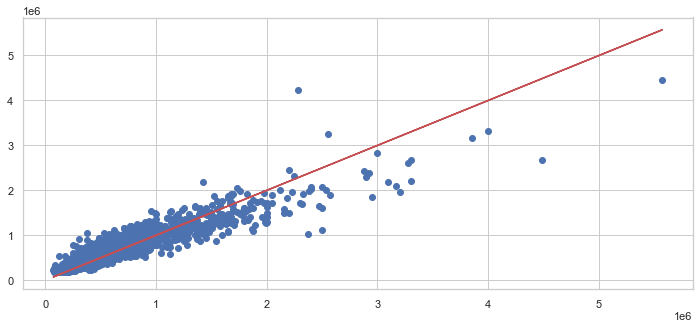

In [48]:
# Visualizando o ajuste do voting emsemble

plt.figure(figsize=(12, 5))
plt.scatter(y_test, emsemble_test_predict)
plt.plot(y_test, y_test, c='r')

In [50]:
# Visualizando os valores reais versus as previsões

emsemble_results['diff'] = emsemble_results['price'] - emsemble_results['price_pred']

emsemble_results.sort_values(by='price', ascending=False)

,price,price_pred,diff
3738,5570000,4447375.91,1122624.09
1733,4489000,2682549.42,1806450.58
4090,4000000,3328180.28,671819.72
3103,3850000,3165982.68,684017.32
964,3300000,2208163.42,1091836.58
...,...,...,...
996,89000,186015.88,-97015.88
3835,85000,188102.56,-103102.56
2757,81000,215095.19,-134095.19
3144,80000,277231.49,-197231.49
